# Healthcare Insurance Fraud Prediction Analysis

In [4]:
!pip install kagglehub

In [71]:
# import libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#download data set from kaggle

path = kagglehub.dataset_download("arpan129/insurance-fraud-detection")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 226k/226k [00:00<00:00, 4.20MB/s]

Extracting model files...
Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\arpan129\insurance-fraud-detection\versions\1


In [3]:
df=pd.read_excel(r"C:\Users\USER\.cache\kagglehub\datasets\arpan129\insurance-fraud-detection\versions\1\Worksheet in Case Study question 2.xlsx")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


#### The data seems to be complete with no missing variables. Two things stand out, the police report table has "?" probably implying unverified and the "umbrella limit table" has extremely small numbers which I'll just round up to zero. Next steps is data cleaning

## Data Cleaning

In [6]:
data=df.copy()

In [7]:
data.isnull()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data=data.replace("?" ,"Unverified")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Unverified,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,Unverified,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,Unverified,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
decimals = 2    
data['umbrella_limit'] = data['umbrella_limit'].apply(lambda x: round(x, decimals))



In [10]:
data.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [11]:
data["authorities_contacted"]

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [13]:
data["authorities_contacted"]=data["authorities_contacted"].fillna("None")

In [14]:
data["incident_type"].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

## Exploratory Data Analysis

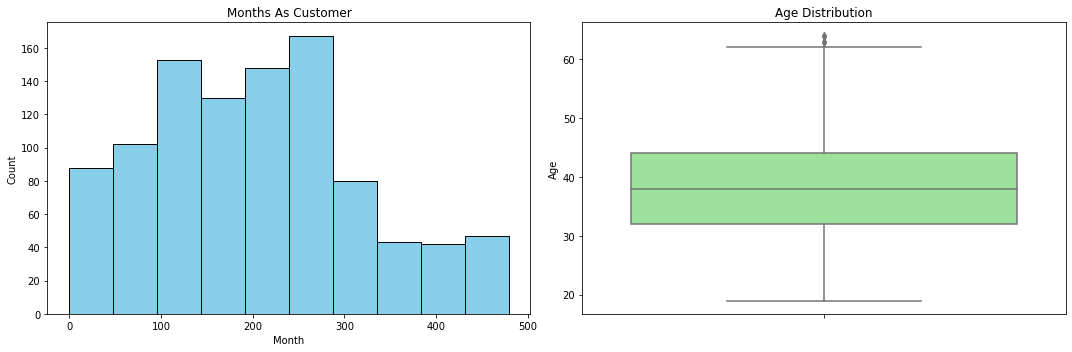

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(data['months_as_customer'],bins=10,color='skyblue',edgecolor='black')
plt.title("Months As Customer")
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(y=data['age'],color='lightgreen')
plt.title("Age Distribution")
plt.ylabel('Age')


plt.tight_layout()
plt.show()

Text(0, 0.5, 'Umbrella Limit')

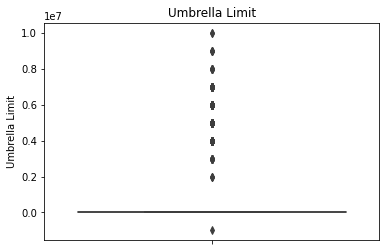

In [131]:
sns.boxplot(y=data['umbrella_limit'],color='brown')
plt.title("Umbrella Limit")
plt.ylabel('Umbrella Limit')

In [150]:
M_Q1=data['umbrella_limit'].quantile(0.25)
M_Q3=data['umbrella_limit'].quantile(0.75)
M_IQR=M_Q3-M_Q1

odf=data[(data["umbrella_limit"]>(M_Q3+1.5*M_IQR))|(data["umbrella_limit"]<(M_Q1-1.5*M_IQR))].copy()

odf.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,202.000000,202.000000,202.000000,202,202.000000,202.000000,2.020000e+02,202.00000,202.000000,202.000000,202,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,205.193069,38.945545,545392.198020,2002-11-28 23:38:36.831683200,1131.188119,1256.461881,5.450495e+06,501890.49505,22537.623762,-27529.702970,2015-01-29 18:03:33.861386240,11.415842,1.777228,1.069307,1.460396,51102.326733,7032.079208,7285.099010,36785.148515,2005.133663
min,2.000000,20.000000,100804.000000,1990-02-15 00:00:00,500.000000,566.110000,-1.000000e+06,430632.00000,0.000000,-91200.000000,2015-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,2640.000000,0.000000,0.000000,1760.000000,1995.000000
25%,107.000000,31.250000,368482.750000,1997-01-23 18:00:00,500.000000,1124.050000,4.000000e+06,446689.75000,0.000000,-51900.000000,2015-01-13 06:00:00,5.250000,1.000000,0.000000,0.000000,40575.000000,4285.000000,4420.000000,27800.000000,1999.250000
50%,204.500000,38.000000,531400.000000,2002-10-18 00:00:00,1000.000000,1259.075000,5.500000e+06,467226.50000,0.000000,-30250.000000,2015-01-31 00:00:00,12.000000,1.000000,1.000000,1.000000,56115.000000,6285.000000,6760.000000,40605.000000,2005.000000
75%,281.750000,44.000000,719699.000000,2009-07-27 12:00:00,2000.000000,1399.080000,6.000000e+06,603803.25000,46700.000000,0.000000,2015-02-13 18:00:00,17.000000,3.000000,2.000000,2.000000,68230.000000,10600.000000,10570.000000,49612.500000,2010.000000
max,465.000000,63.000000,992145.000000,2014-11-14 00:00:00,2000.000000,1935.850000,1.000000e+07,620819.00000,82100.000000,0.000000,2015-02-28 00:00:00,23.000000,4.000000,2.000000,3.000000,103560.000000,16860.000000,21630.000000,77670.000000,2015.000000
std,119.460509,9.437514,241094.260791,NaN,622.039315,225.924075,1.551768e+06,73053.34354,26629.286057,28220.456024,NaN,7.042539,1.004902,0.831679,1.115658,26867.562403,4710.413745,4825.229842,19220.764353,6.145577


In [136]:
nodf=data[~data.index.isin(umbrella_limit_outliers_df.index)]
nodf

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,0,Unverified,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,...,1,Unverified,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,Unverified,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,Unverified,108480,18080,18080,72320,Volkswagen,Passat,2015,N


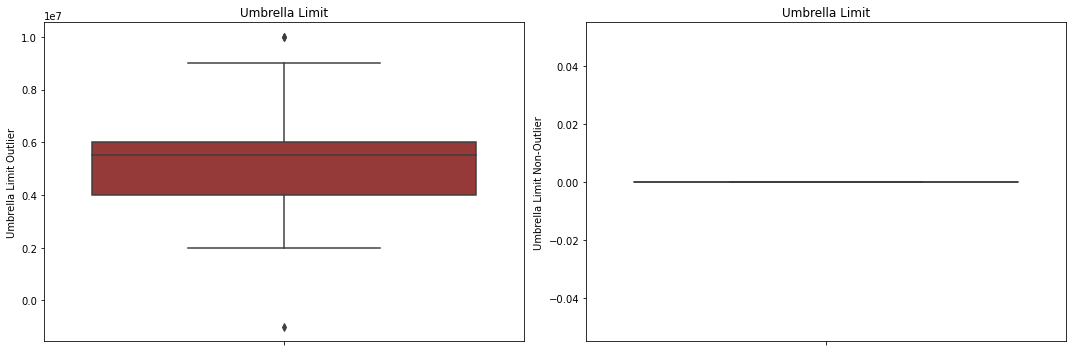

In [179]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(y=odf['umbrella_limit'],color='brown')
plt.title("Umbrella Limit")
plt.ylabel('Umbrella Limit Outlier')

plt.subplot(1,2,2)
sns.boxplot(y=nodf['umbrella_limit'],color='brown')
plt.title("Umbrella Limit")
plt.ylabel('Umbrella Limit Non-Outlier')

plt.tight_layout()
plt.show()

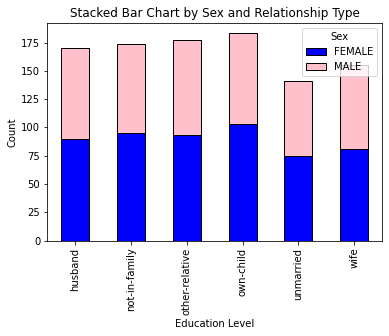

In [16]:

stacked_rel = data.groupby(['insured_relationship', 'insured_sex']).size().unstack(fill_value=0)
stacked_rel.plot(kind='bar', stacked=True, color=['blue', 'pink'], edgecolor='black')
plt.title("Stacked Bar Chart by Sex and Relationship Type")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Sex")


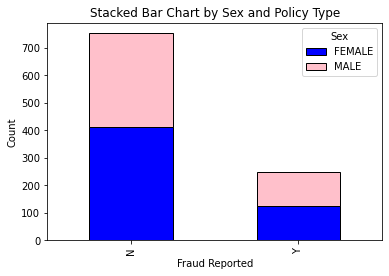

In [17]:
stacked_data = data.groupby(['fraud_reported', 'insured_sex']).size().unstack(fill_value=0)
stacked_data.plot(kind='bar', stacked=True, color=['blue', 'pink'], edgecolor='black')
plt.title("Stacked Bar Chart by Sex and Policy Type")
plt.xlabel("Fraud Reported")
plt.ylabel("Count")
plt.legend(title="Sex")

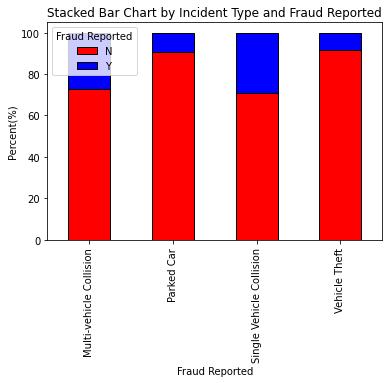

In [18]:
stacked_data = data.groupby(['incident_type', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')

plt.title("Stacked Bar Chart by Incident Type and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Fraud Reported")

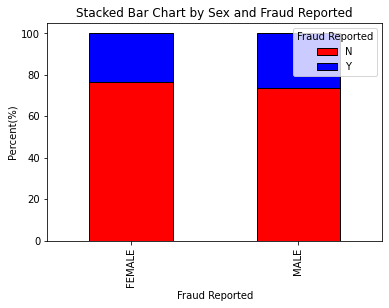

In [19]:
stacked_data = data.groupby(['insured_sex', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')

plt.title("Stacked Bar Chart by Sex and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Fraud Reported")

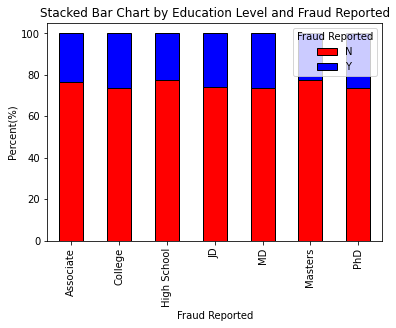

In [20]:
stacked_data = data.groupby(['insured_education_level', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')
plt.title("Stacked Bar Chart by Education Level and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Fraud Reported")


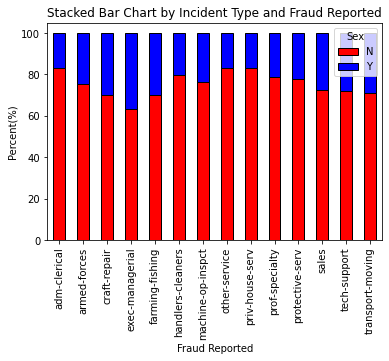

In [21]:
stacked_data = data.groupby(['insured_occupation', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')
plt.title("Stacked Bar Chart by Incident Type and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Sex")

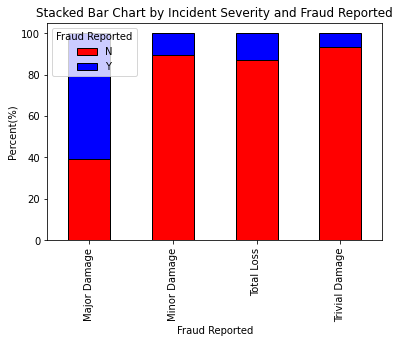

In [180]:
stacked_data = data.groupby(['incident_severity', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')
plt.title("Stacked Bar Chart by Incident Severity and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Fraud Reported")

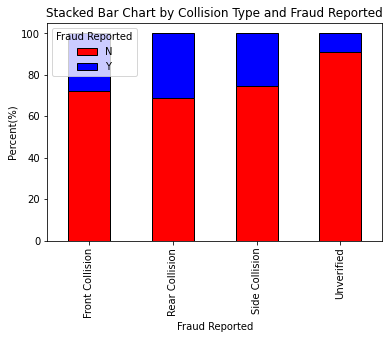

In [185]:
stacked_data = data.groupby(['collision_type', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')
plt.title("Stacked Bar Chart by Collision Type and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Fraud Reported")

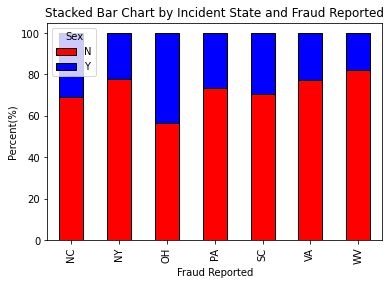

In [23]:
stacked_data = data.groupby(['incident_state', 'fraud_reported']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  
stacked_data_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')
plt.title("Stacked Bar Chart by Incident State and Fraud Reported")
plt.xlabel("Fraud Reported")
plt.ylabel("Percent(%)")
plt.legend(title="Sex")

## Predictive Modeling Using Logistics Regression

In [173]:
dfx=data.copy()
dfx.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


In [163]:
dfx=dfx[['months_as_customer', 'age','insured_sex','policy_csl', 'policy_deductable', 
     'policy_annual_premium', 'umbrella_limit', 
     'incident_severity', 'witnesses','total_claim_amount', 
     'injury_claim', 'property_claim', 'vehicle_claim', 
     'auto_year', 'fraud_reported']]
dfx


,months_as_customer,age,insured_sex,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,incident_severity,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,MALE,250/500,1000,1406.91,0,Major Damage,2,71610,6510,13020,52080,2004,Y
1,228,42,MALE,250/500,2000,1197.22,5000000,Minor Damage,0,5070,780,780,3510,2007,Y
2,134,29,FEMALE,100/300,2000,1413.14,5000000,Minor Damage,3,34650,7700,3850,23100,2007,N
3,256,41,FEMALE,250/500,2000,1415.74,6000000,Major Damage,2,63400,6340,6340,50720,2014,Y
4,228,44,MALE,500/1000,1000,1583.91,6000000,Minor Damage,1,6500,1300,650,4550,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,FEMALE,500/1000,1000,1310.80,0,Minor Damage,1,87200,17440,8720,61040,2006,N
996,285,41,FEMALE,100/300,1000,1436.79,0,Major Damage,3,108480,18080,18080,72320,2015,N
997,130,34,FEMALE,250/500,500,1383.49,3000000,Minor Damage,3,67500,7500,7500,52500,1996,N
998,458,62,MALE,500/1000,2000,1356.92,5000000,Major Damage,1,46980,5220,5220,36540,1998,N


In [164]:
dfx['fraud_reported'] = dfx['fraud_reported'].replace({'Y': 1, 'N': 0})
dfx['insured_sex'] = dfx['insured_sex'].replace({'MALE': 1, 'FEMALE': 0})
dfx

,months_as_customer,age,insured_sex,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,incident_severity,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1,250/500,1000,1406.91,0,Major Damage,2,71610,6510,13020,52080,2004,1
1,228,42,1,250/500,2000,1197.22,5000000,Minor Damage,0,5070,780,780,3510,2007,1
2,134,29,0,100/300,2000,1413.14,5000000,Minor Damage,3,34650,7700,3850,23100,2007,0
3,256,41,0,250/500,2000,1415.74,6000000,Major Damage,2,63400,6340,6340,50720,2014,1
4,228,44,1,500/1000,1000,1583.91,6000000,Minor Damage,1,6500,1300,650,4550,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,500/1000,1000,1310.80,0,Minor Damage,1,87200,17440,8720,61040,2006,0
996,285,41,0,100/300,1000,1436.79,0,Major Damage,3,108480,18080,18080,72320,2015,0
997,130,34,0,250/500,500,1383.49,3000000,Minor Damage,3,67500,7500,7500,52500,1996,0
998,458,62,1,500/1000,2000,1356.92,5000000,Major Damage,1,46980,5220,5220,36540,1998,0


In [165]:
# Convert categorical variables to numerical using One-Hot Encoding
df_encoded = pd.get_dummies(dfx,dtype='int')
df_encoded

,months_as_customer,age,insured_sex,policy_deductable,policy_annual_premium,umbrella_limit,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,328,48,1,1000,1406.91,0,2,71610,6510,13020,52080,2004,1,0,1,0,1,0,0,0
1,228,42,1,2000,1197.22,5000000,0,5070,780,780,3510,2007,1,0,1,0,0,1,0,0
2,134,29,0,2000,1413.14,5000000,3,34650,7700,3850,23100,2007,0,1,0,0,0,1,0,0
3,256,41,0,2000,1415.74,6000000,2,63400,6340,6340,50720,2014,1,0,1,0,1,0,0,0
4,228,44,1,1000,1583.91,6000000,1,6500,1300,650,4550,2009,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,1000,1310.80,0,1,87200,17440,8720,61040,2006,0,0,0,1,0,1,0,0
996,285,41,0,1000,1436.79,0,3,108480,18080,18080,72320,2015,0,1,0,0,1,0,0,0
997,130,34,0,500,1383.49,3000000,3,67500,7500,7500,52500,1996,0,0,1,0,0,1,0,0
998,458,62,1,2000,1356.92,5000000,1,46980,5220,5220,36540,1998,0,0,0,1,1,0,0,0


In [166]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()




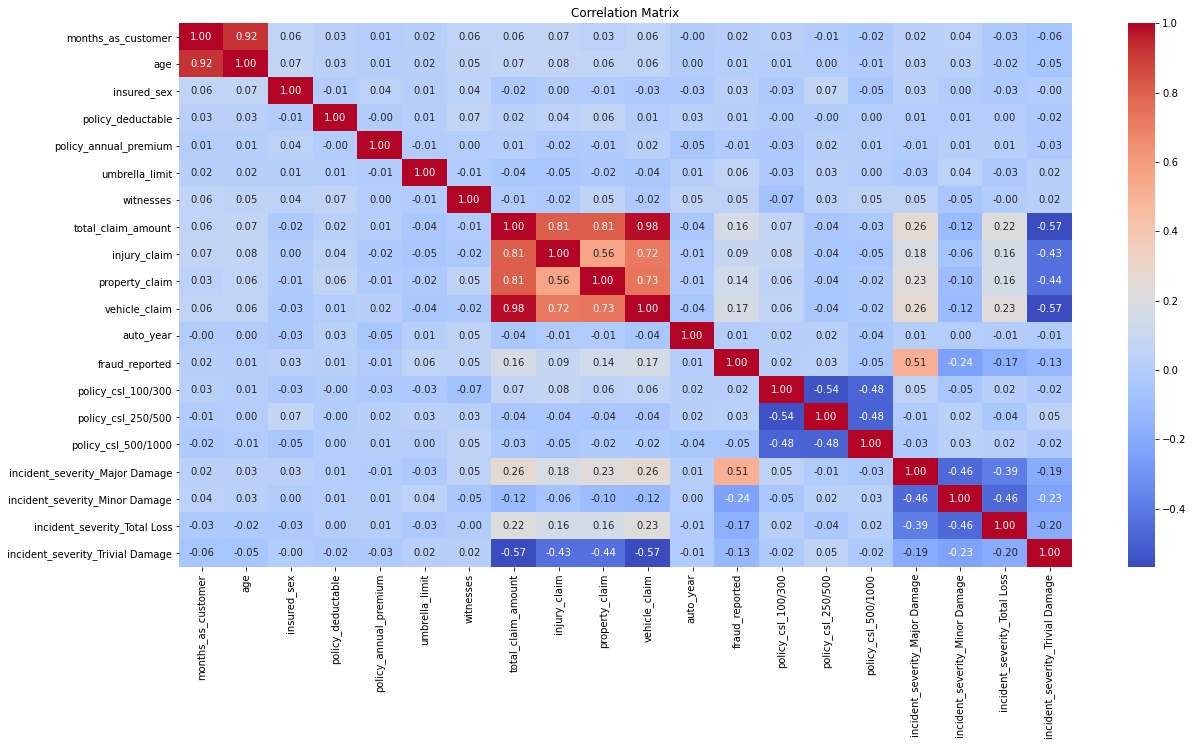

In [167]:
# Plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### The only significant factor in the model seems to be the "incident_severity_Major Damage".While there could be potentially others, finding them out will be heavily limited by the use of dummy variables. Despite there being significant outliers in the column "umbrella_limit", it does not matter as it has very little correlation.

In [168]:
#"total_claim_amount","property_claim","vehicle_claim","incident_severity_Major Damage",
              # "incident_severity_Minor Damage","incident_severity_Total Loss","incident_severity_Trivial Damage"


X=df_encoded[["incident_severity_Major Damage"]]
y=df_encoded[['fraud_reported']]

In [169]:
# Reshaping target variable if needed (flattening)
y = y.values.ravel()  # or y = y.squeeze()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)  # Fitting the model

LogisticRegression()

In [170]:
# Get model parameters
print("Model parameters:")
print(model.get_params())

# Get coefficients and intercept
print("\nModel coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Model coefficients: [[2.31893882]]
Model intercept: [-1.92813187]


In [171]:
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
target_names = ['Non Fraudulent', 'Fraudulent']
print(classification_report(y_test, y_pred,target_names=target_names))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
                precision    recall  f1-score   support

Non Fraudulent       0.93      0.85      0.89       194
    Fraudulent       0.60      0.77      0.67        56

      accuracy                           0.83       250
     macro avg       0.76      0.81      0.78       250
  weighted avg       0.85      0.83      0.84       250

Confusion Matrix:
[[165  29]
 [ 13  43]]


#### The model performs okay although it can be improved by finding other factors that have reasonably high correlations.

In [113]:
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the result table
print(result_df)

     Actual  Predicted
0         0          0
1         0          0
2         0          1
3         1          0
4         1          1
..      ...        ...
245       0          1
246       0          0
247       0          0
248       0          0
249       1          0

[250 rows x 2 columns]
